## Exo-Planet Hunting in Deep Space

#### About the Data

The data describes the change in flux (or light intensity) of several thousands of stars over time. The data's target label to predict says if the star is confirmed to have at least one exoplanet in orbit (2 == Yes, 1 == No). The rest of the features describe the light intensity measure over time for each star. (FLUX1-FLUX3197).

The idea behind this dataset is to simply find new planets by observing fluctuations or certain patterns in light intensity due to an exo-planet obscuring it. 

The data was gathered from NASA's Keplar Space Telescope and was prepared/pre-processed in 2016. 99% of the data comes from Campaign 3 of Keplar's mission. 

In the training data, we have a very low percentage of Stars having Exo planets, where the total was 37 out of the total of 5087. 

#### Goals
- Exploration
- Some Processing
- Classify

#### Import necessary libraries/packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#### Exploration of the data

In [3]:
# Read training data in
train_df = pd.read_csv("exoTrain.csv")

# First 50 rows
train_df.head(50)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


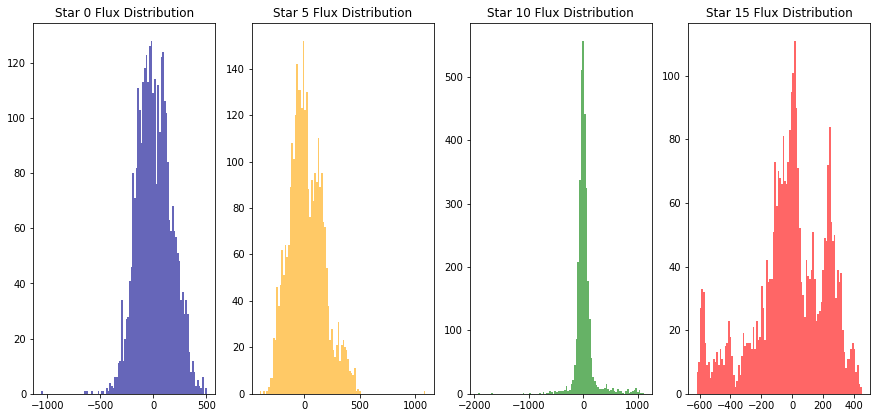

In [49]:
# Remove target col for now
df = train_df.drop(columns="LABEL")

# Get stars with Exo-planet
list_of_vals_star0 = list(df.iloc[0])
list_of_vals_star5 = list(df.iloc[5])
list_of_vals_star10 = list(df.iloc[10])
list_of_vals_star15 = list(df.iloc[15])

# Plot figures
fig=plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2,4,1)
ax.hist(list_of_vals_star0, bins = 100, color="darkblue", alpha=0.6)
plt.title("Star 0 Flux Distribution")

ax = fig.add_subplot(2,4,2)
ax.hist(list_of_vals_star5, bins = 100, color="orange", alpha=0.6)
plt.title("Star 5 Flux Distribution")

ax = fig.add_subplot(2,4,3)
ax.hist(list_of_vals_star10, bins = 100, color="green", alpha=0.6)
plt.title("Star 10 Flux Distribution")

ax = fig.add_subplot(2,4,4)
ax.hist(list_of_vals_star15, bins = 100, color="red", alpha=0.6)
plt.title("Star 15 Flux Distribution")

plt.show()

    
    

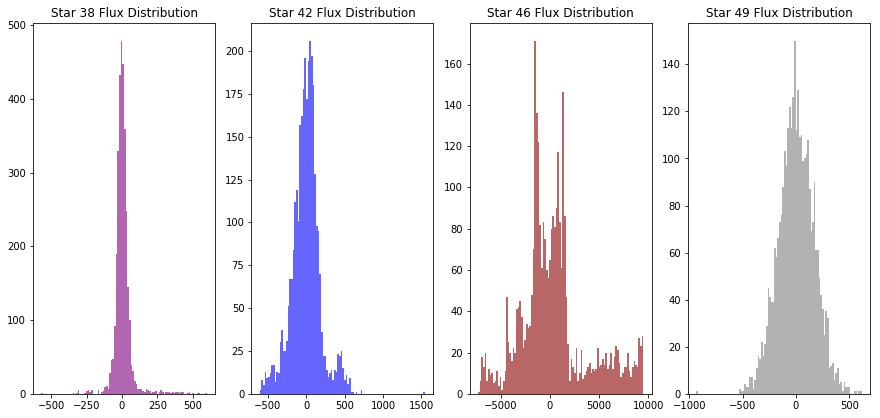

In [61]:
# Get stars without Exo-planet
list_of_vals_star38 = list(df.iloc[38])
list_of_vals_star42 = list(df.iloc[42])
list_of_vals_star46 = list(df.iloc[46])
list_of_vals_star49 = list(df.iloc[49])

# Plot figures
fig=plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2,4,1)
ax.hist(list_of_vals_star38, bins = 100, color="purple", alpha=0.6)
plt.title("Star 38 Flux Distribution")

ax = fig.add_subplot(2,4,2)
ax.hist(list_of_vals_star42, bins = 100, color="blue", alpha=0.6)
plt.title("Star 42 Flux Distribution")

ax = fig.add_subplot(2,4,3)
ax.hist(list_of_vals_star46, bins = 100, color="darkred", alpha=0.6)
plt.title("Star 46 Flux Distribution")

ax = fig.add_subplot(2,4,4)
ax.hist(list_of_vals_star49, bins = 100, color="grey", alpha=0.6)
plt.title("Star 49 Flux Distribution")

plt.show()

#### Stars with Exo planets vs Stars without Exoplanets distribution of Flux values
So, looking at the plots above I simply just picked 4 random stars that have exo planets and 4 without just to get an idea of what data values we are working with. 

Instantly, we see that the range of values covered by each of the different stars differ quite drastically as different stars obviously have different intensities and size. There is no noticeable difference however between stars with exo's and stars without. 

